In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [242]:
df = pd.read_csv('../output/donation_task_data_06_09.csv')

In [243]:
df.head()

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0.0,WWF,NaN,NaN,AS1,It seems generic.,['RU2'],1,1,1,4,3,3,2,2
1,548491acfdf99b0379939cc0,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:44:43.452Z'},0.0,WWF,It gave information on what the organization h...,NaN,AS1,The use of exclamation points and generic writ...,"['RU1', 'RU3', 'RU5', 'RU6']",4,5,4,4,5,5,4,3
2,62d38f10654f3fc8a393b551,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:48:37.138Z'},0.0,WWF,NaN,They didn't say how much of my donation would ...,AS1,It sounded very cut and dry. Basic,['RU7'],3,3,3,4,4,4,1,1
3,5e120ac3ac9e168a3f6ded71,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T23:14:02.375Z'},1.0,WWF,The fact that a donation has an impact.,NaN,AS2,It sounds like a human wrote it with passion.,"['RU3', 'RU6']",4,4,4,4,4,4,4,3
4,65da7c7c8f8bac48599b274a,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-05T10:40:24.928Z'},1.5,WWF,I liked how the advertisement made me feel par...,NaN,AS2,"While reading this advertisement, it felt like...","['RU1', 'RU3', 'RU5', 'RU6']",5,5,5,5,5,5,4,4


In [308]:
df

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0.0,WWF,NaN,NaN,AS1,It seems generic.,[RU2],1,1,1,4,3,3,2,2
1,548491acfdf99b0379939cc0,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:44:43.452Z'},0.0,WWF,It gave information on what the organization h...,NaN,AS1,The use of exclamation points and generic writ...,"[RU1, RU3, RU5, RU6]",4,5,4,4,5,5,4,3
2,62d38f10654f3fc8a393b551,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:48:37.138Z'},0.0,WWF,NaN,They didn't say how much of my donation would ...,AS1,It sounded very cut and dry. Basic,[RU7],3,3,3,4,4,4,1,1
3,5e120ac3ac9e168a3f6ded71,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T23:14:02.375Z'},1.0,WWF,The fact that a donation has an impact.,NaN,AS2,It sounds like a human wrote it with passion.,"[RU3, RU6]",4,4,4,4,4,4,4,3
4,65da7c7c8f8bac48599b274a,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-05T10:40:24.928Z'},1.5,WWF,I liked how the advertisement made me feel par...,NaN,AS2,"While reading this advertisement, it felt like...","[RU1, RU3, RU5, RU6]",5,5,5,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,6693f914675c6778f0a39f20,66d3c3775a434c9ed85a683a,ESP_1,ESP,{'$date': '2024-09-05T17:39:54.53Z'},1.5,WWF,todo,NaN,AS2,Fue escrito en primera persona.,"[RU3, RU5, RU6]",5,5,5,5,5,5,5,5
677,6654d2a81ff59c89050c1b01,95334737950147229a304e3d_LLM,ESP_LLM,ESP,{'$date': '2024-09-04T23:24:45.102Z'},0.7,WWF,Pueden agregar los años que tienen ayudando la...,NaN,AS1,El mensaje proyecta empatía y llamado a la acc...,"[RU1, RU5, RU3]",4,4,5,4,5,4,4,4
678,6560b73479ea077341c338a6,95334737950147229a304e3d_LLM,ESP_LLM,ESP,{'$date': '2024-09-05T01:05:56.432Z'},1.3,WWF,NaN,NaN,AS2,Por la manera en la que la information esta es...,"[RU6, RU5]",4,4,4,4,4,4,4,3
679,6668d35f652e2b8e0616538b,95334737950147229a304e3d_LLM,ESP_LLM,ESP,{'$date': '2024-09-05T06:04:35.308Z'},0.0,WWF,Abre Los Los Joana la situacion del WWF,N/a,AS1,Se siente como si fuera hecho en AI porque le ...,"[RU1, RU4]",4,5,4,4,4,4,4,3


In [310]:
df['attentionCheck'].value_counts()

attentionCheck
WWF    681
Name: count, dtype: int64

In [312]:
df.drop(columns='PROLIFIC_PID').to_csv('../output/donation_data_without_pid.csv',index=False) # for sharing

In [244]:
scale_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5,
    "Totalmente en desacuerdo": 1,
    "En desacuerdo": 2,
    "Neutral": 3,
    "De acuerdo": 4,
    "Totalmente de acuerdo": 5
}

categories = {
    "emotionalAppeal": ["EA1", "EA2", "EA3"],
    "informationAwareness": ["IA1", "IA2", "IA3"],
    "behavioralIntentions": ["BI1", "BI2"],
}

# Emotional Appeal

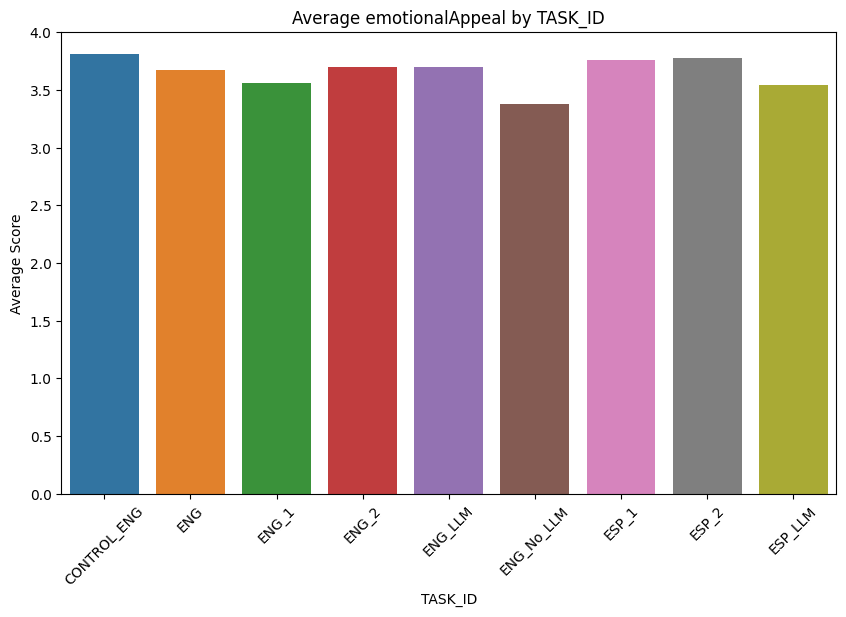

In [245]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
emotionalAppeal_cols = categories['emotionalAppeal']

# Group by 'TASK_ID' and calculate the mean of the ownership columns
grouped_df_cat = df[emotionalAppeal_cols + ['task_id']].groupby('task_id').mean().reset_index()

# Plot the results for the 'Ownership' category


# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[emotionalAppeal_cols].mean(axis=1)


plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=category_mean, errorbar=None)
plt.title('Average emotionalAppeal by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


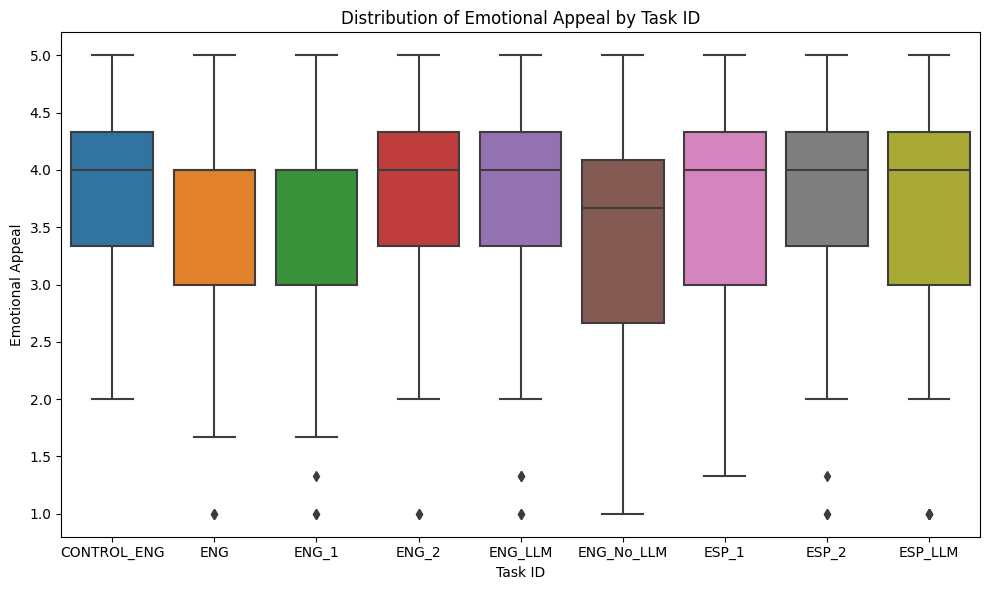

In [391]:
df['EA'] = df[emotionalAppeal_cols].mean(axis=1)

# Plot the distribution of donation data for each task_id using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_id', y='EA', data=df.sort_values(by='task_id'))

plt.title('Distribution of Emotional Appeal by Task ID')
plt.ylabel('Emotional Appeal')
plt.xlabel('Task ID')
plt.tight_layout()
plt.savefig('../figures/results/stage2_ea.pdf')
plt.show()


# Information Awareness

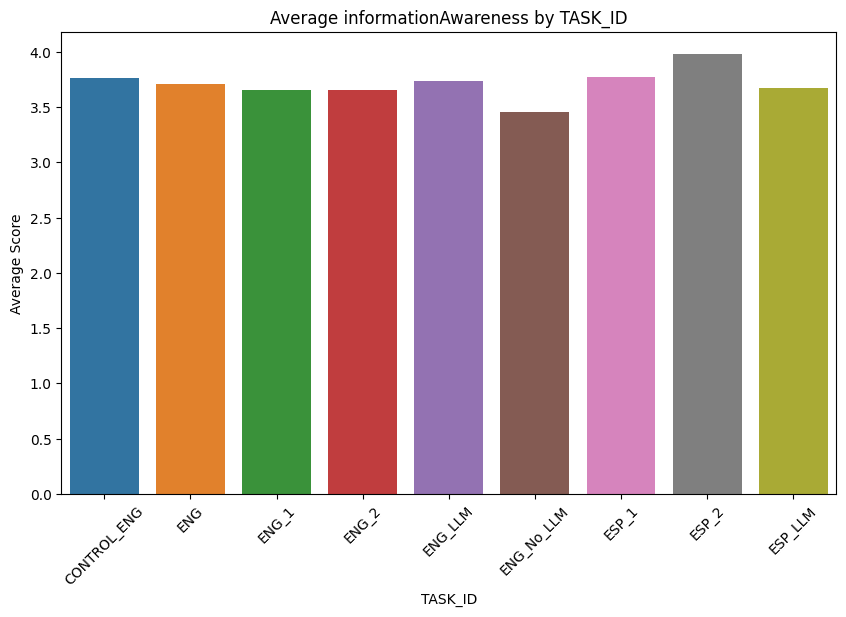

In [387]:

informationAwareness_cols = categories['informationAwareness']

grouped_df_cat = df[informationAwareness_cols + ['task_id']].groupby('task_id').mean().reset_index()

category_mean = grouped_df_cat[informationAwareness_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=category_mean, errorbar=None)
plt.title('Average informationAwareness by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

In [389]:
df['IA'] = df[informationAwareness_cols].mean(axis=1)

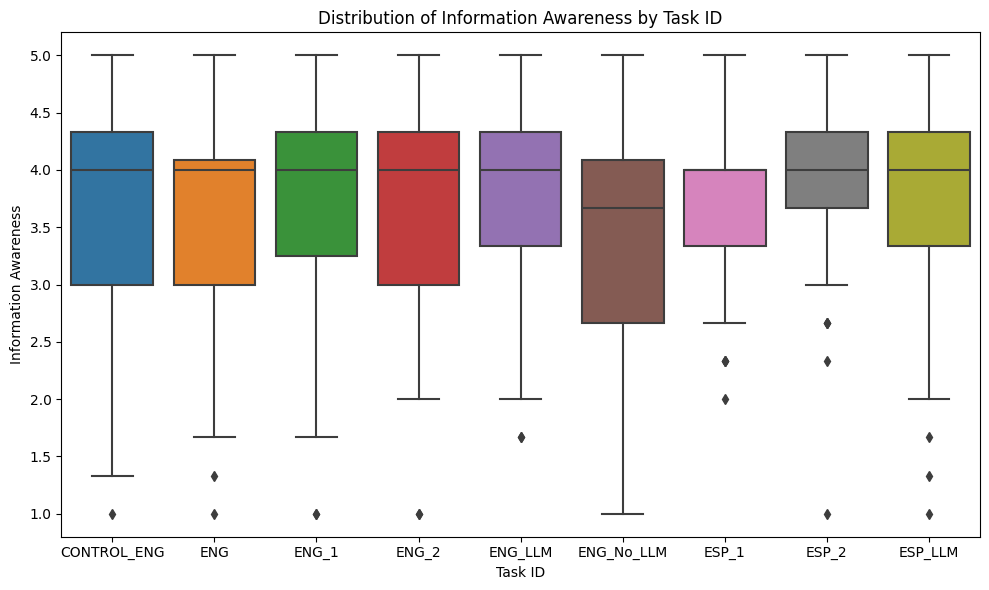

In [390]:
# Plot the distribution of donation data for each task_id using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_id', y='IA', data=df.sort_values(by='task_id'))

plt.title('Distribution of Information Awareness by Task ID')
plt.ylabel('Information Awareness')
plt.xlabel('Task ID')
plt.tight_layout()
plt.savefig('../figures/results/stage2_ia.pdf')
plt.show()


# Behavioural Intentions

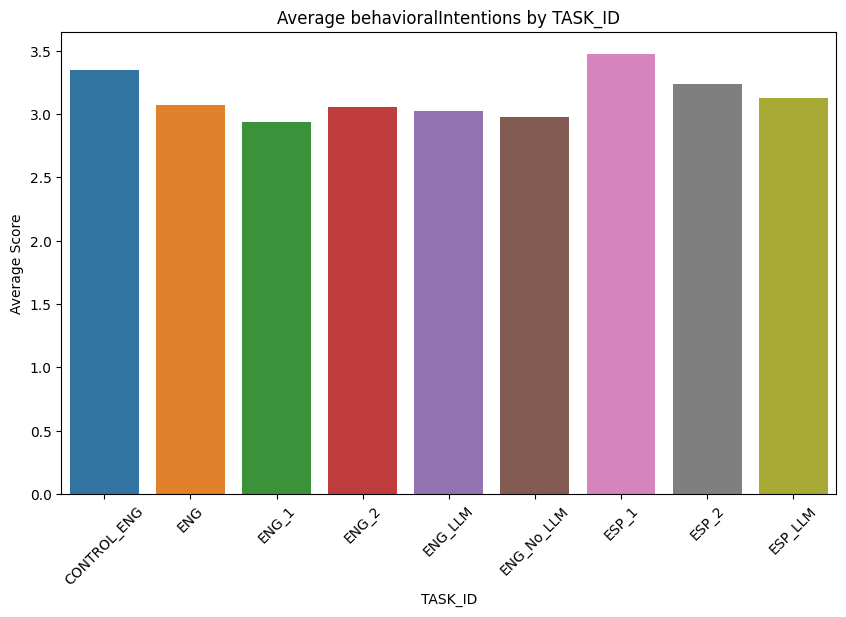

In [317]:
behavioralIntentions_cols = categories['behavioralIntentions']

grouped_df_cat = df[behavioralIntentions_cols + ['task_id']].groupby('task_id').mean().reset_index()



# category_mean = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)
grouped_df_cat['behavioralIntentions'] = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=grouped_df_cat['behavioralIntentions'], errorbar=None)
plt.title('Average behavioralIntentions by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

In [321]:
df['BI'] = df[behavioralIntentions_cols].mean(axis=1)

In [322]:
df[['task_id','BI']]

,task_id,BI
0,ENG,2.0
1,ENG,3.5
2,ENG,1.0
3,ENG,3.5
4,ENG,4.0
...,...,...
676,ESP_1,5.0
677,ESP_LLM,4.0
678,ESP_LLM,3.5
679,ESP_LLM,3.5


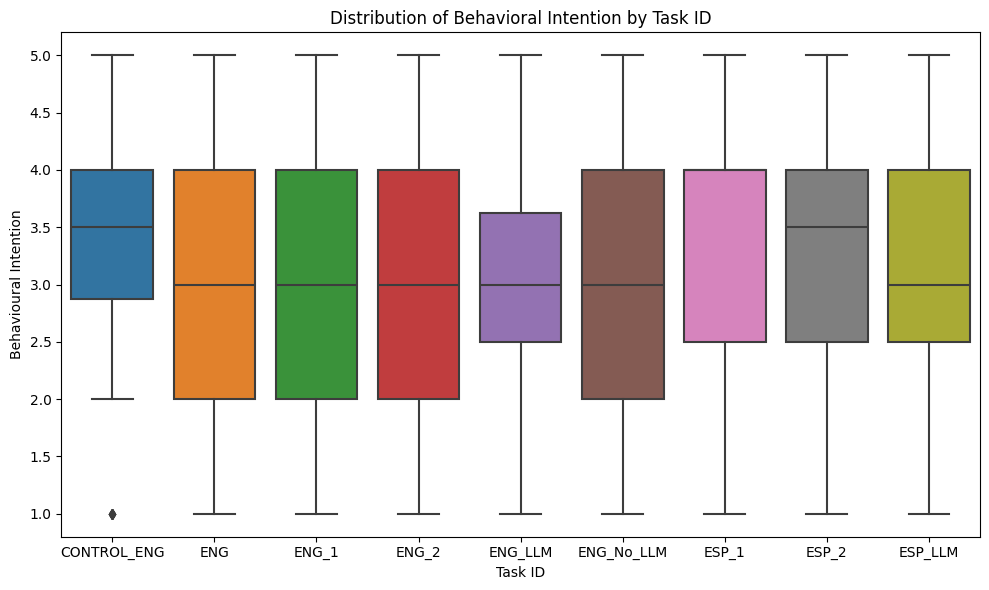

In [384]:
# Plot the distribution of donation data for each task_id using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_id', y='BI', data=df.sort_values(by='task_id'))

plt.title('Distribution of Behavioral Intention by Task ID')
plt.ylabel('Behavioural Intention')
plt.xlabel('Task ID')
plt.tight_layout()
plt.savefig('../figures/results/stage2_bi.pdf')
plt.show()


In [248]:
grouped_df_cat['category_mean'] = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)
grouped_df_cat

,task_id,BI1,BI2,behavioralIntentions,category_mean
0,CONTROL_ENG,3.262500,3.437500,3.350000,3.350000
1,ENG,2.975000,3.175000,3.075000,3.075000
2,ENG_1,2.775000,3.100000,2.937500,2.937500
3,ENG_2,2.875000,3.237500,3.056250,3.056250
4,ENG_LLM,2.937500,3.112500,3.025000,3.025000
5,ENG_No_LLM,2.875000,3.075000,2.975000,2.975000
6,ESP_1,3.375000,3.578125,3.476562,3.476562
7,ESP_2,3.148649,3.324324,3.236486,3.236486
8,ESP_LLM,2.968254,3.285714,3.126984,3.126984


# Donation Data

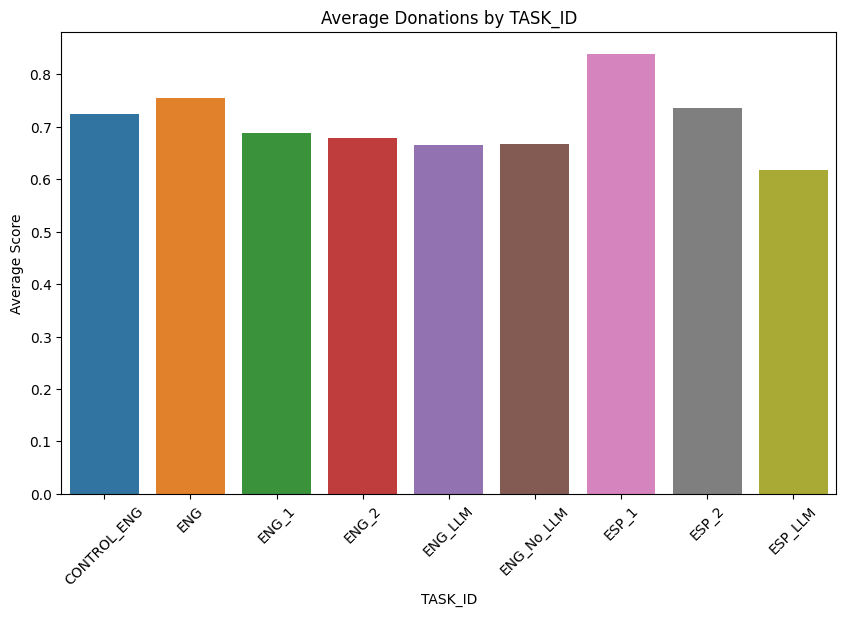

In [324]:

df['donation_data'] = df['donation_data'].astype(float)
grouped_df_cat = df[['donation_data','task_id']].groupby('task_id').mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=grouped_df_cat['donation_data'], errorbar=None)
plt.title('Average Donations by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

In [325]:
grouped_df_cat

,task_id,donation_data
0,CONTROL_ENG,0.723750
1,ENG,0.755000
2,ENG_1,0.688750
3,ENG_2,0.678750
4,ENG_LLM,0.665000
5,ENG_No_LLM,0.667500
6,ESP_1,0.839063
7,ESP_2,0.735135
8,ESP_LLM,0.617460


In [327]:
df.groupby('task_id')['donation_data'].median()

task_id
CONTROL_ENG    0.55
ENG            0.70
ENG_1          0.50
ENG_2          0.70
ENG_LLM        0.50
ENG_No_LLM     0.60
ESP_1          0.70
ESP_2          0.70
ESP_LLM        0.50
Name: donation_data, dtype: float64

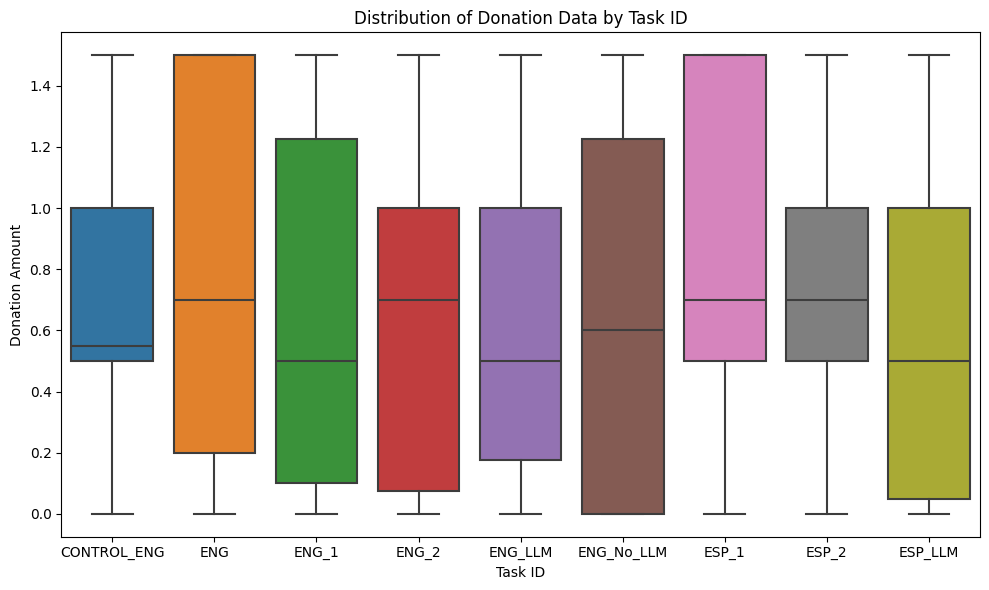

In [380]:
# Plot the distribution of donation data for each task_id using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_id', y='donation_data', data=df.sort_values(by='task_id'))

plt.title('Distribution of Donation Data by Task ID')
plt.ylabel('Donation Amount')
plt.xlabel('Task ID')
plt.tight_layout()
plt.savefig('../figures/results/donation.pdf')
plt.show()


array([[<Axes: title={'center': 'donation_data'}>]], dtype=object)

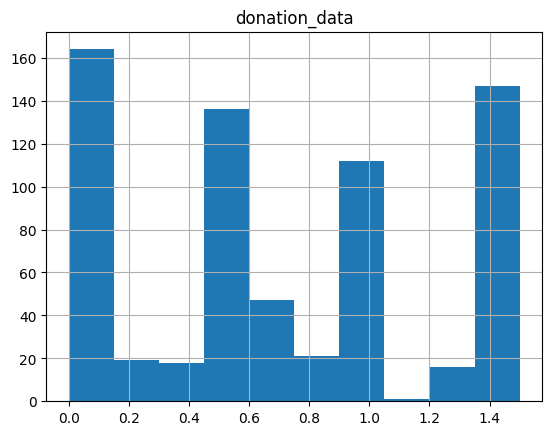

In [329]:
df.hist('donation_data')

In [330]:
df.columns

Index(['PROLIFIC_PID', 'document_id', 'task_id', 'task_category', 'timestamp',
       'donation_data', 'attentionCheck', 'charityFeedbackPositive',
       'charityFeedbackNegative', 'adSource', 'adSourceReason', 'recipeUsed',
       'EA1', 'EA2', 'EA3', 'IA1', 'IA2', 'IA3', 'BI1', 'BI2', 'BI'],
      dtype='object')

In [333]:
df[['donation_data','task_id'] + behavioralIntentions_cols + informationAwareness_cols + emotionalAppeal_cols].to_csv('../output/donation_data.csv',index=False)

In [315]:
from scipy.stats import shapiro, kruskal

# Check for normality using Shapiro-Wilk test
stat, p_value = shapiro(df['donation_data'])

# If the p-value is less than 0.05, the data is not normally distributed
is_normal = p_value > 0.05

# Since it's a single task_id in the provided data, testing statistically significant differences
# between groups might not be possible right now, but assuming more data will be provided, we would use Kruskal-Wallis test
test_statistic, p_value = kruskal(df['donation_data'], df['donation_data'])

is_normal, p_value


(False, 1.0)

In [316]:
# Conduct Kruskal-Wallis test to compare the means across task IDs
kruskal_stat, p_value_kruskal = kruskal(
    df[df['task_id'] == 'ENG_1']['donation_data'],
    df[df['task_id'] == 'ENG_2']['donation_data'],
   
)

kruskal_stat, p_value_kruskal


(0.005308385885478737, 0.9419185825558212)

In [250]:
grouped_df_cat

,task_id,donation_data
0,CONTROL_ENG,0.723750
1,ENG,0.755000
2,ENG_1,0.688750
3,ENG_2,0.678750
4,ENG_LLM,0.665000
5,ENG_No_LLM,0.667500
6,ESP_1,0.839063
7,ESP_2,0.735135
8,ESP_LLM,0.617460


In [251]:
df['donation_data'].describe()

count    681.000000
mean       0.706755
std        0.543259
min        0.000000
25%        0.200000
50%        0.700000
75%        1.000000
max        1.500000
Name: donation_data, dtype: float64

In [252]:
donation_data_percentiles = df[['task_id','donation_data']]

In [253]:
# Define bins based on the donation data value ranges
bins = [0, 0.5, 1.0, 1.5, 2.0]
bin_labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0']

# Add a new column to the dataframe for the donation categories based on the bins
donation_data_percentiles['donation_category'] = pd.cut(donation_data_percentiles['donation_data'], bins=bins, labels=bin_labels, right=False)

# Group by task_id and donation category to see the distribution of donations across categories
donation_category_distribution = donation_data_percentiles.groupby(['task_id', 'donation_category']).size().unstack(fill_value=0)

# Calculate the percentage of donations in each category by task_id
donation_category_percentage = donation_category_distribution.div(donation_category_distribution.sum(axis=1), axis=0) * 100

# Display the result to the user
donation_category_percentage


C:\Users\shrey\AppData\Local\Temp\ipykernel_11120\809634609.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_11120\809634609.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



donation_category,0-0.5,0.5-1.0,1.0-1.5,1.5-2.0
task_id,,,,
CONTROL_ENG,23.750000,37.500000,17.500000,21.250000
ENG,28.750000,27.500000,15.000000,28.750000
ENG_1,33.750000,27.500000,15.000000,23.750000
ENG_2,33.750000,27.500000,20.000000,18.750000
ENG_LLM,33.750000,30.000000,17.500000,18.750000
ENG_No_LLM,38.750000,21.250000,16.250000,23.750000
ESP_1,14.062500,37.500000,18.750000,29.687500
ESP_2,22.972973,35.135135,24.324324,17.567568
ESP_LLM,33.333333,34.920635,20.634921,11.111111


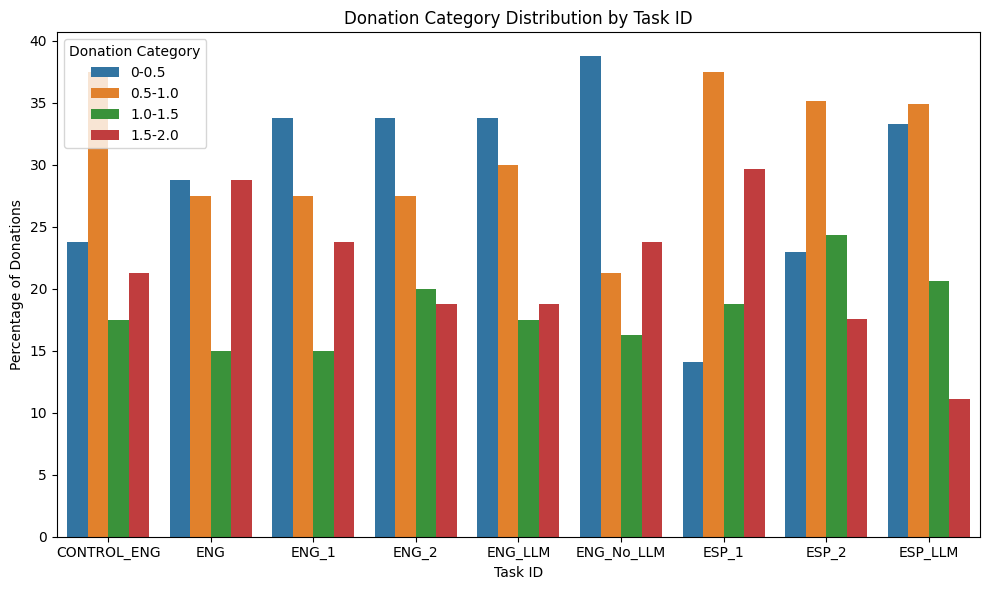

In [254]:
donation_category_percentage_reset = donation_category_percentage.reset_index()

# Melt the data for seaborn to handle easier plotting
donation_melted = donation_category_percentage_reset.melt(id_vars="task_id", var_name="Donation Category", value_name="Percentage")

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='task_id', y='Percentage', hue='Donation Category', data=donation_melted)

plt.title('Donation Category Distribution by Task ID')
plt.ylabel('Percentage of Donations')
plt.xlabel('Task ID')
plt.legend(title='Donation Category')
plt.tight_layout()
plt.show()

In [255]:
import plotly.express as px

# Create a bar plot using Plotly
fig = px.bar(donation_melted, 
             x='task_id', 
             y='Percentage', 
             color='Donation Category', 
             barmode='group', 
             title='Donation Category Distribution by Task ID',
            
             labels={'task_id': 'Task ID', 'Percentage': 'Percentage of Donations'})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Percentage of Donations',
    legend_title='Donation Category',
    template='plotly'
)

# Show the plot
fig.show()


# Ad Source

In [256]:
adsource = df.groupby(['task_id'])['adSource'].value_counts().reset_index()

adsource_config = {
    "AS1": "AI",
    "AS2": "Human",
}
adsource['adSource']= adsource['adSource'].map(lambda x: adsource_config.get(x))

In [257]:
adsource

,task_id,adSource,count
0,CONTROL_ENG,AI,50
1,CONTROL_ENG,Human,30
2,ENG,AI,43
3,ENG,Human,37
4,ENG_1,AI,41
5,ENG_1,Human,39
6,ENG_2,AI,46
7,ENG_2,Human,34
8,ENG_LLM,AI,49
9,ENG_LLM,Human,31


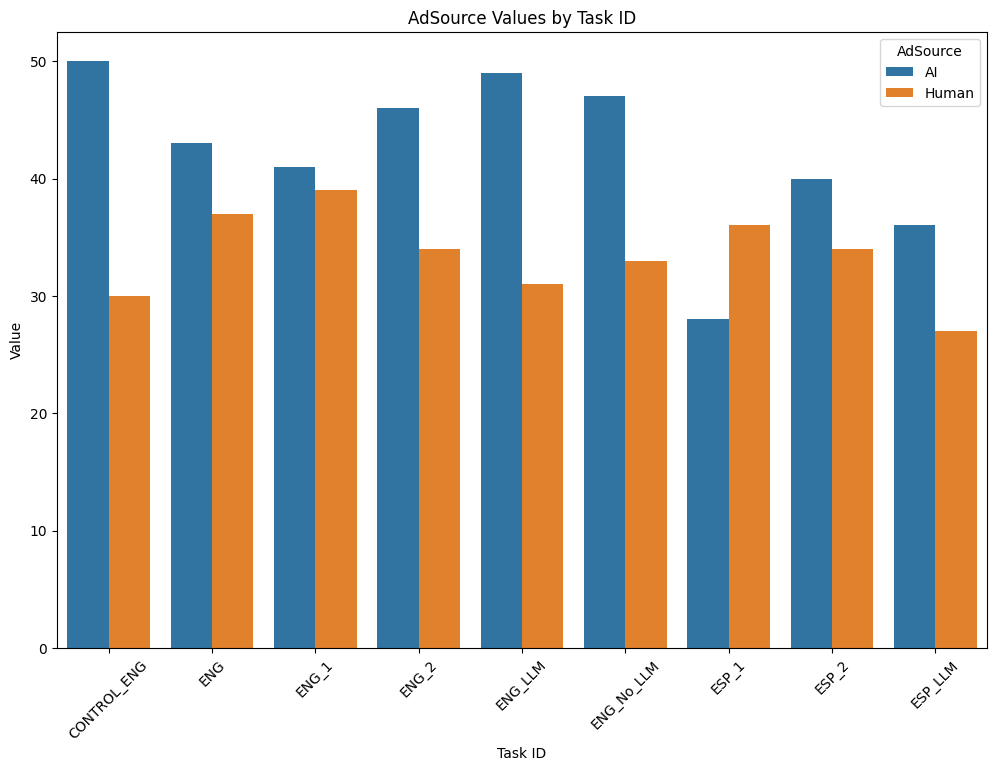

In [258]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='count', hue='adSource', data=adsource)

# Customize the plot
plt.title('AdSource Values by Task ID')
plt.ylabel('Value')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.legend(title='AdSource')

# Show the plot
plt.show()

In [ ]:
df['adSourceReason']

In [259]:
adsource_reason = df.groupby(['task_id', 'adSource'])['adSourceReason'].apply(list).reset_index()
adsource_reason

,task_id,adSource,adSourceReason
0,CONTROL_ENG,AS1,"[It lacked specificity and rambled on. , just ..."
1,CONTROL_ENG,AS2,"[Seems to be relatable., Certain descriptions ..."
2,ENG,AS1,"[It seems generic., The use of exclamation poi..."
3,ENG,AS2,[It sounds like a human wrote it with passion....
4,ENG_1,AS1,[I selected AI because it sounds like an AI wr...
5,ENG_1,AS2,"[My instinct nowadays is ""human"" though it's p..."
6,ENG_2,AS1,"[it probably is AI, nice, The ad just has a bu..."
7,ENG_2,AS2,"[Short and simple, It was an emotional set of ..."
8,ENG_LLM,AS1,"[Because it seems formal, Its random star plac..."
9,ENG_LLM,AS2,[because the articles sense real and affection...


In [260]:
adsource_reason.iloc[0]['adSourceReason']

['It lacked specificity and rambled on. ',
 "just the way it's put together",
 'does not sound human ',
 "Now that I think about it, it does seem like there isn't a human touch to the ad.",
 'Just the way it is worded. Sounds kind of stylized I guess is the best description ',
 'unsure',
 'It is too much detailed',
 'it seems like a basic description',
 'word choice\n',
 'it seems ai generated as opposed to human generated',
 'Style artificial in nature.',
 'due to the way it is written. ',
 'It seems like a boilerplate appeal for funding. ',
 'it seems a bit robotic and also the font makes me lean that way too',
 'Because of the broad language and no direct examples',
 'Kinda robotic.',
 "Because it's emotionless",
 'I think it was with the help of AI at least since that seems to be what most places are doing now. It is just an assumption.',
 'Repetition of several words and short sentences, mostly. The word "seek" was used too many times.',
 "There are some grammar and syntax points 

In [261]:
adsource_reason.to_csv('../output/adSource_reason.csv', index=False)

In [262]:
df.head(1)

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0.0,WWF,NaN,NaN,AS1,It seems generic.,['RU2'],1,1,1,4,3,3,2,2


# Feedback

In [263]:
charityFeedbackPositive = df[df['charityFeedbackPositive']!='NA'].groupby('task_id')['charityFeedbackPositive'].unique().reset_index()
charityFeedbackNegative = df[df['charityFeedbackNegative']!='NA'].groupby('task_id')['charityFeedbackNegative'].unique().reset_index()

charityFeedback = charityFeedbackPositive.merge(charityFeedbackNegative,on='task_id', how='inner')


In [27]:
charityFeedback

,task_id,charityFeedbackPositive,charityFeedbackNegative
0,CONTROL_ENG,"[I like the fact of giving back., They are pro...","[nan, I thought it was a little too wordy and ..."
1,ENG,"[nan, It gave information on what the organiza...","[nan, They didn't say how much of my donation ..."
2,ENG_1,"[nan, I like that there was specific informati...","[nan, I feel too little was said about the tas..."
3,ENG_2,"[Short, I liked that the charity talked about ...","[nan, I did not like that it felt to be pressu..."
4,ENG_LLM,"[The meaning behind it, nan, Protecting specie...","[nan, It's way too wordy. Way too much text to..."
5,ENG_No_LLM,"[na, I think it does a decent job of taking ho...","[na, It doesn't really explain what WWF is or ..."
6,ESP_1,"[Como enviar crisis, Me gusta que hayan mencio...","[nan, me gustaria haber escuchado cosas mas im..."
7,ESP_2,[Me gustó que se está enfocando en todo el gru...,"[nan, La frase inicial que desea un futuro don..."
8,ESP_LLM,"[nan, el atractivo de la humanidad, Que era co...","[nan, Todo, Que no era lo suficientemente inte..."


In [264]:
charityFeedback.to_csv('../output/donationFeedback_final.csv', index=False)

# Recipe Used

In [265]:
df['recipeUsed'] = df['recipeUsed'].apply(ast.literal_eval)

In [266]:
recipeUsed = df.groupby('task_id')['recipeUsed'].sum().reset_index()
recipeUsed['recipeUsed_count'] = recipeUsed['recipeUsed'].apply(lambda x: dict(Counter(x)))
recipeUsed

,task_id,recipeUsed,recipeUsed_count
0,CONTROL_ENG,"[RU5, RU6, RU1, RU5, RU6, RU7, RU7, RU7, RU3, ...","{'RU5': 20, 'RU6': 24, 'RU1': 16, 'RU7': 39, '..."
1,ENG,"[RU2, RU1, RU3, RU5, RU6, RU7, RU3, RU6, RU1, ...","{'RU2': 9, 'RU1': 26, 'RU3': 19, 'RU5': 34, 'R..."
2,ENG_1,"[RU6, RU3, RU1, RU3, RU5, RU6, RU1, RU3, RU6, ...","{'RU6': 24, 'RU3': 17, 'RU1': 20, 'RU5': 19, '..."
3,ENG_2,"[RU3, RU2, RU7, RU4, RU7, RU7, RU7, RU7, RU4, ...","{'RU3': 21, 'RU2': 8, 'RU7': 15, 'RU4': 6, 'RU..."
4,ENG_LLM,"[RU1, RU3, RU2, RU7, RU6, RU7, RU6, RU1, RU3, ...","{'RU1': 19, 'RU3': 9, 'RU2': 6, 'RU7': 15, 'RU..."
5,ENG_No_LLM,"[RU1, RU7, RU6, RU2, RU7, RU1, RU7, RU5, RU6, ...","{'RU1': 13, 'RU7': 30, 'RU6': 27, 'RU2': 12, '..."
6,ESP_1,"[RU1, RU5, RU4, RU2, RU6, RU1, RU2, RU5, RU2, ...","{'RU1': 30, 'RU5': 29, 'RU4': 5, 'RU2': 18, 'R..."
7,ESP_2,"[RU7, RU5, RU6, RU6, RU5, RU2, RU6, RU1, RU2, ...","{'RU7': 17, 'RU5': 31, 'RU6': 30, 'RU2': 14, '..."
8,ESP_LLM,"[RU7, RU1, RU3, RU7, RU7, RU1, RU5, RU1, RU3, ...","{'RU7': 19, 'RU1': 15, 'RU3': 11, 'RU5': 25, '..."


In [267]:
ru_mapping = {
    'RU1': "A positive story about how donations have helped others.",
    'RU2': "A warning story about what can happen without donations.",
    'RU3': "Numbers showing the positive impact of donations.",
    'RU4': "Numbers highlighting the negative consequences of not donating.",
    'RU5': "How donations can make a difference right away.",
    'RU6': "How donations will help in the long run.",
    'RU7': "None of the Above"
}

In [268]:
counts_df = pd.DataFrame(recipeUsed['recipeUsed_count'].tolist()).fillna(0).astype(int)

# Add the 'task_id' back to the counts DataFrame
counts_df['task_id'] = recipeUsed['task_id']

# Set the task_id as the index for easier plotting
counts_df.set_index('task_id', inplace=True)

counts_df.rename(columns=ru_mapping, inplace=True)

In [269]:
fig = px.imshow(counts_df.T, 
                labels=dict(x="Task ID", y="Donation Story", color="Count"),
                x=counts_df.index,
                y=counts_df.columns,
                color_continuous_scale="YlGnBu",
                text_auto=True,
                aspect='auto')

# Show the plot
fig.show()

# Mapping to usage data

In [270]:
usage_data = pd.read_csv('../output/consolidated_actions.csv')
usage_data

,document_id,task_id,event_type,content,timestamp,consolidated_actions,encoded_sequence
0,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,[<1x120 sparse matrix of type '<class 'numpy.f...
1,66c522869236da2225cc8cf2,ENG,key,@,2024-08-20 23:11:10.893000+00:00,@,[<1x120 sparse matrix of type '<class 'numpy.f...
2,66c522869236da2225cc8cf2,ENG,key,a,2024-08-20 23:11:11.345000+00:00,a,[<1x120 sparse matrix of type '<class 'numpy.f...
3,66c522869236da2225cc8cf2,ENG,key,i,2024-08-20 23:11:11.502000+00:00,i,[<1x120 sparse matrix of type '<class 'numpy.f...
4,66c522869236da2225cc8cf2,ENG,key,,2024-08-20 23:11:11.793000+00:00,,[<1x120 sparse matrix of type '<class 'numpy.f...
...,...,...,...,...,...,...,...
47644,66d3ca8a5a434c9ed85a685a,ENG_2,key,Backspace,2024-09-01 02:01:06.282000+00:00,Backspace,[<1x120 sparse matrix of type '<class 'numpy.f...
47645,66d3ca8a5a434c9ed85a685a,ENG_2,key,,2024-09-01 02:01:06.762000+00:00,,[<1x120 sparse matrix of type '<class 'numpy.f...
47646,66d3ca8a5a434c9ed85a685a,ENG_2,key,,2024-09-01 02:01:53.113000+00:00,,[<1x120 sparse matrix of type '<class 'numpy.f...
47647,66d3ca8a5a434c9ed85a685a,ENG_2,key,Control,2024-09-01 02:01:53.369000+00:00,Control,[<1x120 sparse matrix of type '<class 'numpy.f...


In [271]:
usage_data['event_type'].unique()

array(['key', '@ai generation', 'Emphasis on Long-Term Outcome',
       'Emphasis on Immediate Outcome',
       'Cautionary Narrative with Statistics',
       'Positive Narrative Framing with Statistics',
       'Cautionary Narrative Framing', 'Positive Narrative Framing',
       'continuation', 'custom'], dtype=object)

In [272]:
usage_data.drop(columns=['encoded_sequence'], inplace=True)

# Hidden markov model

In [ ]:
from hmmlearn import hmm
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm


In [37]:
doc_sequences = usage_data.groupby('document_id')['consolidated_actions'].apply(list).reset_index()
doc_sequences

,document_id,consolidated_actions
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,..."
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac..."
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ..."
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a..."
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,..."
...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ..."
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B..."
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a..."
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]"


In [273]:
master_list = usage_data.merge(df, on='document_id', how='inner')
master_list

,document_id,task_id_x,event_type,content,timestamp_x,consolidated_actions,PROLIFIC_PID,task_id_y,task_category,timestamp_y,...,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,611087db754dae727592763b,ENG,ENG,{'$date': '2024-09-04T21:13:46.888Z'},...,"The unnatural asterisks added, as well as, the...","[RU6, RU2]",4,5,3,4,4,3,3,4
1,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,66687940b6066d0b32735285,ENG,ENG,{'$date': '2024-09-04T22:49:04.32Z'},...,I don't think AI would come up with something ...,[RU6],4,4,4,4,4,3,3,3
2,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,60ff4947f329136761a45103,ENG,ENG,{'$date': '2024-09-04T22:56:00.452Z'},...,"There’s a lot of passion in the ad, I don’t th...",[RU5],4,5,5,5,5,5,5,4
3,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,66c35f5caa40f6de28800d89,ENG,ENG,{'$date': '2024-09-04T23:16:31.111Z'},...,It was very plainly and simply written,[RU5],2,5,3,1,3,2,3,4
4,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00,Shift,5ef9302c07b0e310918662c3,ENG,ENG,{'$date': '2024-09-05T10:51:42.295Z'},...,I think the longer WWF paragraph seems more hu...,[RU2],4,4,4,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228679,66d3ca8a5a434c9ed85a685a,ENG_2,key,v,2024-09-01 02:01:53.565000+00:00,v,6689b775decbc522030ddc73,ENG_2,ENG,{'$date': '2024-09-04T22:39:01.971Z'},...,Too many adjectives.,[RU5],5,5,5,2,2,2,3,4
228680,66d3ca8a5a434c9ed85a685a,ENG_2,key,v,2024-09-01 02:01:53.565000+00:00,v,5e648efca8c76520c918bb31,ENG_2,ENG,{'$date': '2024-09-04T22:44:14.932Z'},...,It seems vague enough that an AI LLM could wri...,[RU5],3,4,3,3,3,3,2,2
228681,66d3ca8a5a434c9ed85a685a,ENG_2,key,v,2024-09-01 02:01:53.565000+00:00,v,61118b5fd788969295997051,ENG_2,ENG,{'$date': '2024-09-04T23:07:33.029Z'},...,AI tends to overuse flourishing language like ...,"[RU5, RU6]",4,5,5,2,2,3,2,4
228682,66d3ca8a5a434c9ed85a685a,ENG_2,key,v,2024-09-01 02:01:53.565000+00:00,v,6417dfab27377aff2c54af66,ENG_2,ENG,{'$date': '2024-09-04T23:18:47.327Z'},...,"Could be either, I just guessed",[RU7],2,3,2,3,2,2,2,2


In [274]:
master_list_donation_data = master_list.groupby('document_id')['donation_data'].mean().reset_index()
master_list_donation_data = master_list_donation_data.merge(df[['document_id','task_id']], on='document_id',how='inner').drop_duplicates(subset=['document_id','task_id'])

In [275]:
master_list = doc_sequences.merge(master_list_donation_data[['document_id','donation_data', 'task_id']])
master_list

,document_id,consolidated_actions,donation_data,task_id
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG
...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2


In [276]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Dense output to make it compatible with HMM

# Extract all unique actions
all_actions = [action for actions_list in master_list['consolidated_actions'] for action in actions_list]

# Fit the encoder on the unique actions
encoder.fit(np.array(all_actions).reshape(-1, 1))

# Function to encode sequences of actions
def encode_sequence(sequence):
    return encoder.transform(np.array(sequence).reshape(-1, 1))

# Apply the encoding to each document's consolidated actions
master_list['encoded_sequence'] = master_list['consolidated_actions'].apply(encode_sequence)


In [277]:
# Extract the sequences for fitting the HMM
all_sequences = master_list['encoded_sequence'].tolist()

# Concatenate all sequences into a single dataset for HMM fitting
combined_sequences = np.concatenate(all_sequences)

# Initialize and fit a Gaussian HMM model (4 hidden states: IA, EA, BI, Other)
n_states = 4
hmm_model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000)
hmm_model.fit(combined_sequences)

# Print transition matrix and emission means
print("Transition Matrix:")
print(hmm_model.transmat_)

print("Means of emissions (representing states):")
print(hmm_model.means_)


Transition Matrix:
[[0.30554607 0.06760352 0.16788324 0.45896718]
 [0.08961994 0.7153192  0.0520934  0.14296745]
 [0.3464627  0.05710644 0.30579989 0.29063097]
 [0.44214371 0.10231425 0.16544862 0.29009341]]
Means of emissions (representing states):
[[0.00000000e+00 6.82128240e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.82128240e-05 1.35743520e-02 0.00000000e+00 1.81446112e-02
  1.36425648e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.09276944e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.04638472e-03 4.77489768e-04 2.04638472e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 7.09413370e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.23738063e-02 0.00000000e+00 2.04638472e-03
  0.00000000e+00 0.00000000e+00 3.26739427e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.13778990e-03 3.13778990e-03 3.95634379e-03
  1.36

In [278]:
# Predict hidden states for each document
master_list['predicted_hidden_states'] = master_list['encoded_sequence'].apply(lambda seq: hmm_model.predict(seq))

# Display the predicted hidden states for the first few documents
print(master_list[['document_id', 'predicted_hidden_states']].head())


                document_id                            predicted_hidden_states
0  66c522869236da2225cc8cf2  [3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...
1  66c5241b9236da2225cc8cfa  [3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...
2  66c524a69236da2225cc8cfd  [3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...
3  66c5a13c86c57a87db6f59d9  [3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...
4  66c5a21086c57a87db6f59e1  [3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...


In [279]:
master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ..."
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ..."
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ..."
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ..."
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ..."
...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ..."
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ..."
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 0, 1, 2, 0]"


In [280]:
Counter(master_list.iloc[1]['predicted_hidden_states'])

Counter({3: 7, 2: 9, 0: 9, 1: 8})

In [281]:
for state in range(n_states):
    master_list[f'count_state_{state}'] = master_list['predicted_hidden_states'].apply(lambda x: Counter(x).get(state, 0))

# Check the DataFrame to ensure counts are correct
print(master_list[[f'count_state_{i}' for i in range(n_states)]].head())

   count_state_0  count_state_1  count_state_2  count_state_3
0             85             12             51            104
1              9              8              9              7
2             59             18             28             73
3             25             21             16             35
4             42             22             24             44


In [282]:
df.head()

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0.0,WWF,NaN,NaN,AS1,It seems generic.,[RU2],1,1,1,4,3,3,2,2
1,548491acfdf99b0379939cc0,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:44:43.452Z'},0.0,WWF,It gave information on what the organization h...,NaN,AS1,The use of exclamation points and generic writ...,"[RU1, RU3, RU5, RU6]",4,5,4,4,5,5,4,3
2,62d38f10654f3fc8a393b551,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T22:48:37.138Z'},0.0,WWF,NaN,They didn't say how much of my donation would ...,AS1,It sounded very cut and dry. Basic,[RU7],3,3,3,4,4,4,1,1
3,5e120ac3ac9e168a3f6ded71,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T23:14:02.375Z'},1.0,WWF,The fact that a donation has an impact.,NaN,AS2,It sounds like a human wrote it with passion.,"[RU3, RU6]",4,4,4,4,4,4,4,3
4,65da7c7c8f8bac48599b274a,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-05T10:40:24.928Z'},1.5,WWF,I liked how the advertisement made me feel par...,NaN,AS2,"While reading this advertisement, it felt like...","[RU1, RU3, RU5, RU6]",5,5,5,5,5,5,4,4


In [283]:
IA = df.groupby('document_id')[informationAwareness_cols].mean().mean(axis=1).reset_index()
IA.columns = ['document_id','IA']
IA_master_list = master_list.merge(IA)
IA_master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,IA
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,3.466667
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,3.600000
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,4.400000
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,4.200000
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,4.133333
...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,3.400000
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,2.833333
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,3.933333
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 0, 1, 2, 0]",2,1,2,1,4.333333


In [284]:

# Define the independent variables (count of each hidden state)
X = IA_master_list[[f'count_state_{i}' for i in range(n_states)]]

# Define the dependent variable (Information Awareness, IA1)
Y = IA_master_list['IA']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     IA   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9619
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.432
Time:                        14:22:22   Log-Likelihood:                -75.435
No. Observations:                  96   AIC:                             160.9
Df Residuals:                      91   BIC:                             173.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7697      0.081     46.605

In [285]:
EA = df.groupby('document_id')[emotionalAppeal_cols].mean().mean(axis=1).reset_index()
EA.columns = ['document_id','EA']
EA_master_list = master_list.merge(EA)
EA_master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,EA
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,4.000000
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,4.066667
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,4.400000
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,3.466667
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,3.866667
...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,3.200000
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,3.416667
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,3.800000
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 0, 1, 2, 0]",2,1,2,1,4.133333


In [286]:
# Define the independent variables (count of each hidden state)
X = EA_master_list[[f'count_state_{i}' for i in range(n_states)]]

# Define the dependent variable (Information Awareness, IA1)
Y = EA_master_list['EA']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     EA   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.079
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.372
Time:                        14:22:33   Log-Likelihood:                -59.987
No. Observations:                  96   AIC:                             130.0
Df Residuals:                      91   BIC:                             142.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6982      0.069     53.704

In [287]:
BI = df.groupby('document_id')[behavioralIntentions_cols].mean().mean(axis=1).reset_index()
BI.columns = ['document_id','BI']
BI_master_list = master_list.merge(BI)
BI_master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,BI
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,3.400
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,2.500
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,4.000
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,2.800
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,3.300
...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,2.300
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,2.875
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,2.300
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 0, 1, 2, 0]",2,1,2,1,3.600


In [288]:
# Define the independent variables (count of each hidden state)
X = BI_master_list[[f'count_state_{i}' for i in range(n_states)]]

# Define the dependent variable (Information Awareness, IA1)
Y = BI_master_list['BI']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     BI   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4678
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.759
Time:                        14:22:37   Log-Likelihood:                -80.122
No. Observations:                  96   AIC:                             170.2
Df Residuals:                      91   BIC:                             183.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1297      0.085     36.850

In [289]:
donation = df.groupby('document_id')['donation_data'].mean().reset_index()
donation.columns = ['document_id','donation']
donation_master_list = master_list.merge(donation)
donation_master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,donation
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,1.200
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,0.600
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,1.200
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,0.500
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,0.500
...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,0.200
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,0.875
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,0.660
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3, 2, 0, 1, 2, 0]",2,1,2,1,0.700


In [290]:
# Define the independent variables (count of each hidden state)
X = donation_master_list[[f'count_state_{i}' for i in range(n_states)]]

# Define the dependent variable (Information Awareness, IA1)
Y = donation_master_list['donation']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               donation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                   0.08569
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.987
Time:                        14:22:44   Log-Likelihood:                -12.906
No. Observations:                  96   AIC:                             35.81
Df Residuals:                      91   BIC:                             48.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7320      0.042     17.360

# DTW Clustering

In [332]:
from dtaidistance import dtw
import statsmodels.api as sm

In [304]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on all actions across documents
all_actions = [action for actions_list in master_list['consolidated_actions'] for action in actions_list]


# encoder.fit(np.array(all_actions).reshape(-1, 1))

# Function to encode a sequence of actions
# def encode_sequence(sequence):
#     return encoder.transform(np.array(sequence).reshape(-1, 1))

# # Apply the encoding to each document's action sequence
# master_list['encoded_sequence'] = master_list['consolidated_actions'].apply(encode_sequence)


In [338]:
encoder.categories_[0].shape

(120,)

In [340]:
len(set(all_actions))

120

In [341]:
unique_actions = list(set(all_actions))

action_map = {action: idx for idx, action in enumerate(unique_actions)}

master_list['encoded_sequence'] = master_list['consolidated_actions'].apply(lambda actions: [action_map[action] for action in actions])

In [342]:
master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[75, 40, 113, 57, 99, 86, 4, 57, 102, 77, 99, ...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[11, 75, 40, 113, 57, 99, 34, 85, 11, 11, 11, ...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[34, 52, 34, 85, 11, 75, 110, 77, 52, 54, 15, ...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[75, 75, 40, 113, 57, 99, 86, 4, 57, 102, 77, ...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[75, 40, 113, 57, 99, 69, 98, 77, 113, 64, 77,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44
...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[11, 34, 84, 40, 113, 57, 99, 86, 4, 57, 102, ...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[75, 104, 75, 40, 113, 57, 99, 69, 98, 77, 113...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[11, 34, 85, 11, 34, 85]","[3, 2, 0, 1, 2, 0]",2,1,2,1


In [344]:
encoded_sequences = master_list['encoded_sequence'].tolist()

# Flatten each sequence (as DTW works on sequences of scalars, not vectors)
# flattened_sequences = [np.concatenate(seq) for seq in encoded_sequences]

# Compute the pairwise DTW distance matrix between sequences
distance_matrix = dtw.distance_matrix(encoded_sequences)

# Print the DTW distance matrix
print(distance_matrix)

[[  0.         491.27487214 340.10586587 ... 339.66748446 601.84549512
  524.89236992]
 [491.27487214   0.         387.73960334 ... 456.95951681 167.6961538
  129.63024338]
 [340.10586587 387.73960334   0.         ... 319.51838758 503.94146485
  423.62719459]
 ...
 [339.66748446 456.95951681 319.51838758 ...   0.         558.48545191
  475.50289168]
 [601.84549512 167.6961538  503.94146485 ... 558.48545191   0.
  153.28405005]
 [524.89236992 129.63024338 423.62719459 ... 475.50289168 153.28405005
    0.        ]]


In [377]:
import hdbscan

# Perform HDBSCAN clustering using the DTW distance matrix
hdbscan_clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)
hdbscan_labels = hdbscan_clusterer.fit_predict(distance_matrix)

# Add the HDBSCAN labels to the DataFrame
master_list['hdbscan_cluster'] = hdbscan_labels

# Check the resulting clusters
print(master_list[['document_id', 'hdbscan_cluster']])


                 document_id  hdbscan_cluster
0   66c522869236da2225cc8cf2               -1
1   66c5241b9236da2225cc8cfa                1
2   66c524a69236da2225cc8cfd               -1
3   66c5a13c86c57a87db6f59d9                0
4   66c5a21086c57a87db6f59e1                0
..                       ...              ...
91  66d3c7e95a434c9ed85a6847               -1
92  66d3c85f5a434c9ed85a684b               -1
93  66d3c8af5a434c9ed85a684e               -1
94  66d3c8b05a434c9ed85a684f                1
95  66d3ca8a5a434c9ed85a685a                1

[96 rows x 2 columns]


In [378]:
import plotly.express as px

# Create a scatter plot with Plotly
fig = px.scatter(
    master_list, 
    x='document_id', 
    y='hdbscan_cluster', 
    color='task_id',  # Color points by task_id
    hover_data=['task_id'],  # Display task_id on hover
    title="HDBSCAN Clustering of Documents Based on DTW Distances",
    labels={'hdbscan_cluster': 'HDBSCAN Cluster', 'document_id': 'Document ID'}
)

# Show the interactive plot
fig.show()



In [373]:
len(distance_matrix)

96

In [347]:
master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,average_dtw_distance
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[75, 40, 113, 57, 99, 86, 4, 57, 102, 77, 99, ...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,543.078483
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[11, 75, 40, 113, 57, 99, 34, 85, 11, 11, 11, ...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,592.326556
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[34, 52, 34, 85, 11, 75, 110, 77, 52, 54, 15, ...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,526.386883
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[75, 75, 40, 113, 57, 99, 86, 4, 57, 102, 77, ...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,557.852177
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[75, 40, 113, 57, 99, 69, 98, 77, 113, 64, 77,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,551.360403
...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[11, 34, 84, 40, 113, 57, 99, 86, 4, 57, 102, ...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,528.449448
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,590.230087
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[75, 104, 75, 40, 113, 57, 99, 69, 98, 77, 113...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,555.020156
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[11, 34, 85, 11, 34, 85]","[3, 2, 0, 1, 2, 0]",2,1,2,1,718.115241


In [348]:
df.columns

Index(['PROLIFIC_PID', 'document_id', 'task_id', 'task_category', 'timestamp',
       'donation_data', 'attentionCheck', 'charityFeedbackPositive',
       'charityFeedbackNegative', 'adSource', 'adSourceReason', 'recipeUsed',
       'EA1', 'EA2', 'EA3', 'IA1', 'IA2', 'IA3', 'BI1', 'BI2', 'BI'],
      dtype='object')

In [349]:
# Calculate the average DTW distance for each document
average_dtw_distance = np.mean(distance_matrix, axis=1)

# Add the average DTW distance to the master_list DataFrame
master_list['average_dtw_distance'] = average_dtw_distance

# Example: Regress IA1 on the average DTW distance


# Define the independent variable (average DTW distance)
X = master_list[['average_dtw_distance']]

# Define the dependent variable (IA1, Information Awareness)
Y = IA_master_list['IA']

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     IA   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.477
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.227
Time:                        18:49:20   Log-Likelihood:                -76.675
No. Observations:                  96   AIC:                             157.3
Df Residuals:                      94   BIC:                             162.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9869 

In [351]:
from sklearn.cluster import AgglomerativeClustering


In [367]:
clustering_dtw = AgglomerativeClustering(n_clusters=3, linkage='complete')


In [368]:
labels = clustering_dtw.fit_predict(average_dtw_distance.reshape(-1, 1))


In [369]:
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [370]:
master_list['cluster'] = labels


In [371]:
master_list

,document_id,consolidated_actions,donation_data,task_id,encoded_sequence,predicted_hidden_states,count_state_0,count_state_1,count_state_2,count_state_3,average_dtw_distance,cluster
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG,"[75, 40, 113, 57, 99, 86, 4, 57, 102, 77, 99, ...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 2, ...",85,12,51,104,543.078483,1
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG,"[11, 75, 40, 113, 57, 99, 34, 85, 11, 11, 11, ...","[3, 3, 2, 2, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, ...",9,8,9,7,592.326556,1
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG,"[34, 52, 34, 85, 11, 75, 110, 77, 52, 54, 15, ...","[3, 0, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, ...",59,18,28,73,526.386883,1
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG,"[75, 75, 40, 113, 57, 99, 86, 4, 57, 102, 77, ...","[3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 3, ...",25,21,16,35,557.852177,1
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG,"[75, 40, 113, 57, 99, 69, 98, 77, 113, 64, 77,...","[3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 3, ...",42,22,24,44,551.360403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2,"[11, 34, 84, 40, 113, 57, 99, 86, 4, 57, 102, ...","[3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 2, 3, ...",77,15,53,95,528.449448,1
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",123,113,51,126,590.230087,1
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2,"[75, 104, 75, 40, 113, 57, 99, 69, 98, 77, 113...","[3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 1, 3, 3, 0, ...",63,38,37,88,555.020156,1
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2,"[11, 34, 85, 11, 34, 85]","[3, 2, 0, 1, 2, 0]",2,1,2,1,718.115241,1


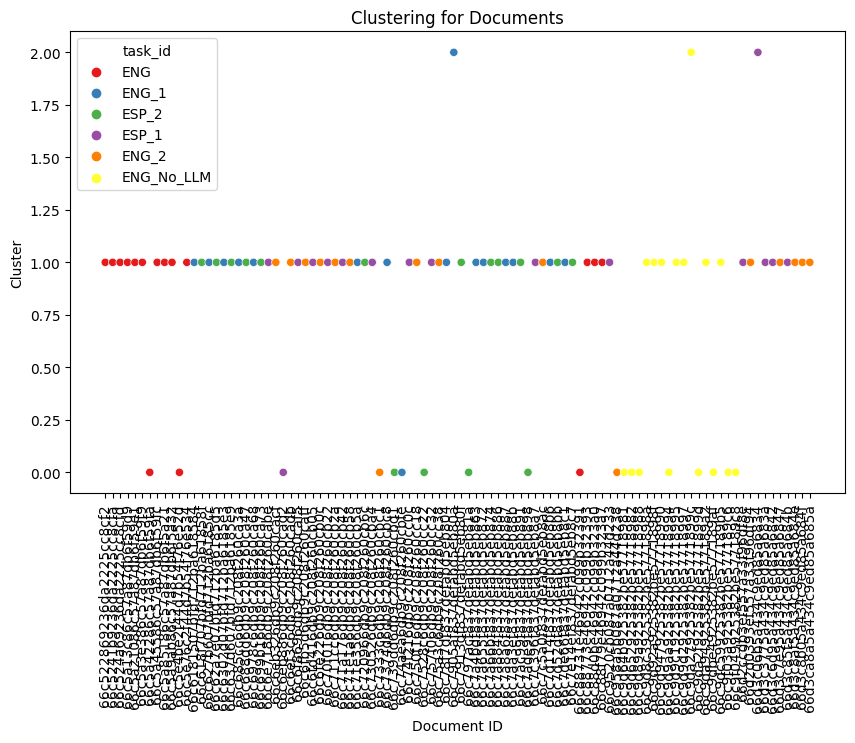

In [372]:
plt.figure(figsize=(10, 6))
plt.title("Clustering for Documents")

# Correct the scatterplot by referencing the master_list DataFrame correctly
sns.scatterplot(x=master_list['document_id'], y=master_list['cluster'], hue=master_list['task_id'], palette='Set1')

plt.xlabel("Document ID")
plt.ylabel("Cluster")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# OLS using feature usage count

In [291]:
main_master_list = master_list[['document_id',	'consolidated_actions',	'donation_data',	'task_id'	]]

In [292]:
unique_actions = len(list(set(all_actions)))

In [294]:
main_master_list

,document_id,consolidated_actions,donation_data,task_id
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",1.200,ENG
1,66c5241b9236da2225cc8cfa,"[Backspace, Shift, @, a, i, , Control, v, Bac...",0.600,ENG
2,66c524a69236da2225cc8cfd,"[Control, c, Control, v, Backspace, Shift, B, ...",1.200,ENG
3,66c5a13c86c57a87db6f59d9,"[Shift, Shift, @, a, i, , w, r, i, t, e, , a...",0.500,ENG
4,66c5a21086c57a87db6f59e1,"[Shift, @, a, i, , p, l, e, a, s, e, , w, r,...",0.500,ENG
...,...,...,...,...
91,66d3c7e95a434c9ed85a6847,"[Backspace, Control, AltGraph, @, a, i, , w, ...",0.200,ENG_2
92,66d3c85f5a434c9ed85a684b,"[Backspace, Backspace, Backspace, Backspace, B...",0.875,ESP_1
93,66d3c8af5a434c9ed85a684e,"[Shift, ArrowUp, Shift, @, a, i, , p, l, e, a...",0.660,ENG_2
94,66d3c8b05a434c9ed85a684f,"[Backspace, Control, v, Backspace, Control, v]",0.700,ENG_2


In [295]:
usage_data_filtered = usage_data[usage_data['event_type'] != 'key']

# Group by 'document_id' and 'event_type', then count the occurrences
usage_counts = usage_data_filtered.groupby(['document_id', 'event_type']).size().reset_index(name='count')

# Pivot the table so that event types become columns
pivot_table_ai_Feature_usage_count = usage_counts.pivot_table(index='document_id', columns='event_type', values='count', aggfunc='sum').reset_index()

# Display the pivot table
pivot_table_ai_Feature_usage_count

event_type,document_id,@ai generation,Cautionary Narrative Framing,Cautionary Narrative with Statistics,Emphasis on Immediate Outcome,Emphasis on Long-Term Outcome,Positive Narrative Framing,Positive Narrative Framing with Statistics,continuation,custom
0,66c522869236da2225cc8cf2,5.0,2.0,1.0,2.0,2.0,4.0,1.0,NaN,NaN
1,66c5241b9236da2225cc8cfa,2.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN
2,66c524a69236da2225cc8cfd,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,66c5a13c86c57a87db6f59d9,1.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN
4,66c5a21086c57a87db6f59e1,1.0,1.0,1.0,1.0,NaN,1.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
69,66d3c6d95a434c9ed85a6842,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN
70,66d3c7e95a434c9ed85a6847,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN
71,66d3c85f5a434c9ed85a684b,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
72,66d3c8af5a434c9ed85a684e,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN


In [296]:
pivot_table_ai_Feature_usage_count.replace(np.nan, 0, inplace=True)

In [297]:
IA[IA['document_id']=='66c522869236da2225cc8cf2']

,document_id,IA
11,66c522869236da2225cc8cf2,3.466667


In [298]:
usage_names_list = [
    "continuation",
    "@ai generation",
    "Positive Narrative Framing",
    "Cautionary Narrative Framing",
    "Positive Narrative Framing with Statistics",
    "Cautionary Narrative with Statistics",
    "Emphasis on Immediate Outcome",
    "Emphasis on Long-Term Outcome"
]

In [299]:
pivot_table_ai_Feature_usage_count.merge(IA)[usage_names_list]

,continuation,@ai generation,Positive Narrative Framing,Cautionary Narrative Framing,Positive Narrative Framing with Statistics,Cautionary Narrative with Statistics,Emphasis on Immediate Outcome,Emphasis on Long-Term Outcome
0,0.0,5.0,4.0,2.0,1.0,1.0,2.0,2.0
1,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
69,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
70,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
71,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [300]:
# Define the independent variables (count of each hidden state)
tmp = pivot_table_ai_Feature_usage_count.merge(IA)
X =tmp[usage_names_list]

# Define the dependent variable (Information Awareness, IA1)
Y = tmp['IA']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     IA   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.802
Date:                Fri, 06 Sep 2024   Prob (F-statistic):             0.0926
Time:                        14:23:28   Log-Likelihood:                -52.688
No. Observations:                  74   AIC:                             123.4
Df Residuals:                      65   BIC:                             144.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [301]:
# Define the independent variables (count of each hidden state)
tmp = pivot_table_ai_Feature_usage_count.merge(EA)
X =tmp[usage_names_list]

# Define the dependent variable (Information Awareness, IA1)
Y = tmp['EA']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     EA   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.393
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.216
Time:                        14:23:37   Log-Likelihood:                -39.683
No. Observations:                  74   AIC:                             97.37
Df Residuals:                      65   BIC:                             118.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [302]:
# Define the independent variables (count of each hidden state)
tmp = pivot_table_ai_Feature_usage_count.merge(BI)
X =tmp[usage_names_list]

# Define the dependent variable (Information Awareness, IA1)
Y = tmp['BI']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     BI   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.469
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.186
Time:                        14:23:39   Log-Likelihood:                -56.396
No. Observations:                  74   AIC:                             130.8
Df Residuals:                      65   BIC:                             151.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [303]:
# Define the independent variables (count of each hidden state)
tmp = pivot_table_ai_Feature_usage_count.merge(donation)
X =tmp[usage_names_list]

# Define the dependent variable (Information Awareness, IA1)
Y = tmp['donation']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               donation   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.236
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.293
Time:                        14:23:41   Log-Likelihood:                -6.8023
No. Observations:                  74   AIC:                             31.60
Df Residuals:                      65   BIC:                             52.34
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## key logs to outcome